# Tutorial 2: Implementing perils in the GenMR digital template


**Author:** Arnaud Mignan, Mignan Risk Analytics GmbH  
**Version:** 0.1  
**Last Updated:** 2025-11-04   
**License:** AGPL-3, https://opensource.org/license/agpl-v3 

Once a virtual environment has been generated (see previous tutorial), stochastic events can be modelled to populate it. Table 1 lists the perils so far considered in version 1.1.1 as well as the ones to be added in the near future (v. 1.1.2).

<br>
<center><small><b>Tab. 1.</b> List of perils with identifiers (ID) according to <a href='https://www.cambridge.org/highereducation/books/introduction-to-catastrophe-risk-modelling/A3A5B5FB990921422BFEBB07734BF869#overview' target='_blank'>Mignan (2024:tab.1.7)</a>.</small></center>

| ID | Peril | Peril type | Source class | Event size | Intensity class | Intensity measure | Status<sup>&#8224;</sup> |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
|  | **NATURAL** |  |  |  |  |  |  |
| `AI` | Asteroid impact | Primary | Point | Kinetic energy (kt) | Analytical | Overpressure (kPa) | <span style="color: green">&#x2713;<span> |
| `Dr` | Drought |  |  |  |  |  | <span style="color: orange">&#x2717;<span> |
| `EQ` | Earthquake | Primary | Line | Magnitude | Analytical | Peak ground acceleration (m/s$^2$) | <span style="color: green">&#x2713;<span> |
| `FF` | Fluvial flood | Secondary (to `RS`) | Point | Peak flow | Cellular automaton | Inundation depth (m) | <span style="color: green">&#x2713;<span> |
| `HW` | Heatwave |  |  |  |  |  | <span style="color: orange">&#x2717;<span> |
| `Li` | Lightning |  |  |  |  |  | <span style="color: orange">&#x2717;<span> |
| `LS` | Landslide | Secondary (to `RS`) | Diffuse | Area (km$^2$) | Cellular automaton | Thickness (m) | <span style="color: green">&#x2713;<span> |
| `PI` | Pest infestation |  |  |  |  |  | <span style="color: orange">&#x2717;<span> |
| `RS` | Rainstorm | Primary (invisible$^*$) | Area | Rain intensity (mm/hr) | Threshold | - | <span style="color: green">&#x2713;<span> |
| `SS` | Storm surge | Secondary (to `WS`) | Line | Coastal surge height (m) | Threshold | Inundation depth (m) | <span style="color: green">&#x2713;<span> |
| `TC` | Tropical cyclone | Primary | Track | Max. wind speed (m/s) | Analytical | Max. wind speed (m/s) | <span style="color: green">&#x2713;<span> |
| `To` | Tornado |  |  |  |  |  | <span style="color: orange">&#x2717;<span> |
| `VE` | Volcanic eruption | Primary | Point | Volume erupted (km$^3$) | Analytical | Ash load (kPa) | <span style="color: green">&#x2713;<span> |
| `WF` | Wildfire | Primary | Diffuse | Burnt area | Cellular automaton | Burnt/not burnt | <span style="color: green">&#x2713;<span> |
| `WS` | Windstorm |  |  |  |  |  | <span style="color: orange">&#x2717;<span> |
|  | **TECHNOLOGICAL** |  |  |  |  |  |  |
| `BO` | Blackout |  |  |  |  |  | <span style="color: orange">&#x2717;<span> |
| `Ex` | Explosion (industrial) | Primary | Point | TNT mass (kt) | Analytical | Overpressure $P$ (kPa) | <span style="color: green">&#x2713;<span> |
|  | **SOCIO-ECONOMIC** |  |  |  |  |  |  |
| `BI` | Business interruption |  |  |  |  |  | <span style="color: orange">&#x2717;<span> |
| `Sf` | Public service failure |  |  |  |  |  | <span style="color: orange">&#x2717;<span> |
| `SU` | Social unrest |  |  |  |  |  | <span style="color: orange">&#x2717;<span> |

<small>$^*$ Rainstorm is called an 'invisible peril' (following <a href='https://link.springer.com/article/10.1007/s11069-014-1178-4' target='_blank'>Mignan et al., 2014</a>) since it does not cause any direct damage in the present framework. It is implemented as both the landslide and fluvial flood triggering mechanism.<br>
               <sup>&#8224;</sup> To be included in current version 1.1.1 (<span style="color: green">&#x2713;</span>), planned for v.1.1.2 (<span style="color: orange">&#x2717;</span>).</small>


ADD TEXT

Figure 1 illustrates the relationship between some stochastic event footprints and the underlying environment:

<br>

```{figure} ../figures/digitaltemplate_ev_rayshader.png
:name: fig-digitaltemplate
:width: 500px
:align: center

**Fig. 1.** One instance of the GenMR digital template (default parameterisation) with an example of event hazard intensity footprint and loss footprint (here for a large earthquake). Simulation rendered using [Rayshader](https://www.rayshader.com/) (Morgan-Wall, 2022).

/Users/arnaudmignan/Documents/GmbH_MRA/2_fundedR&D/2025-2027_GenMR_SCOR/GenMR_SCOR/GenMR/environment.py:605: RuntimeWarning: divide by zero encountered in divide
  FS = (par['Ceff_Pa'] / (par['rho_kg/m3'] * GenMR_utils.g_earth * h) + np.cos(slope * np.pi/180) * \


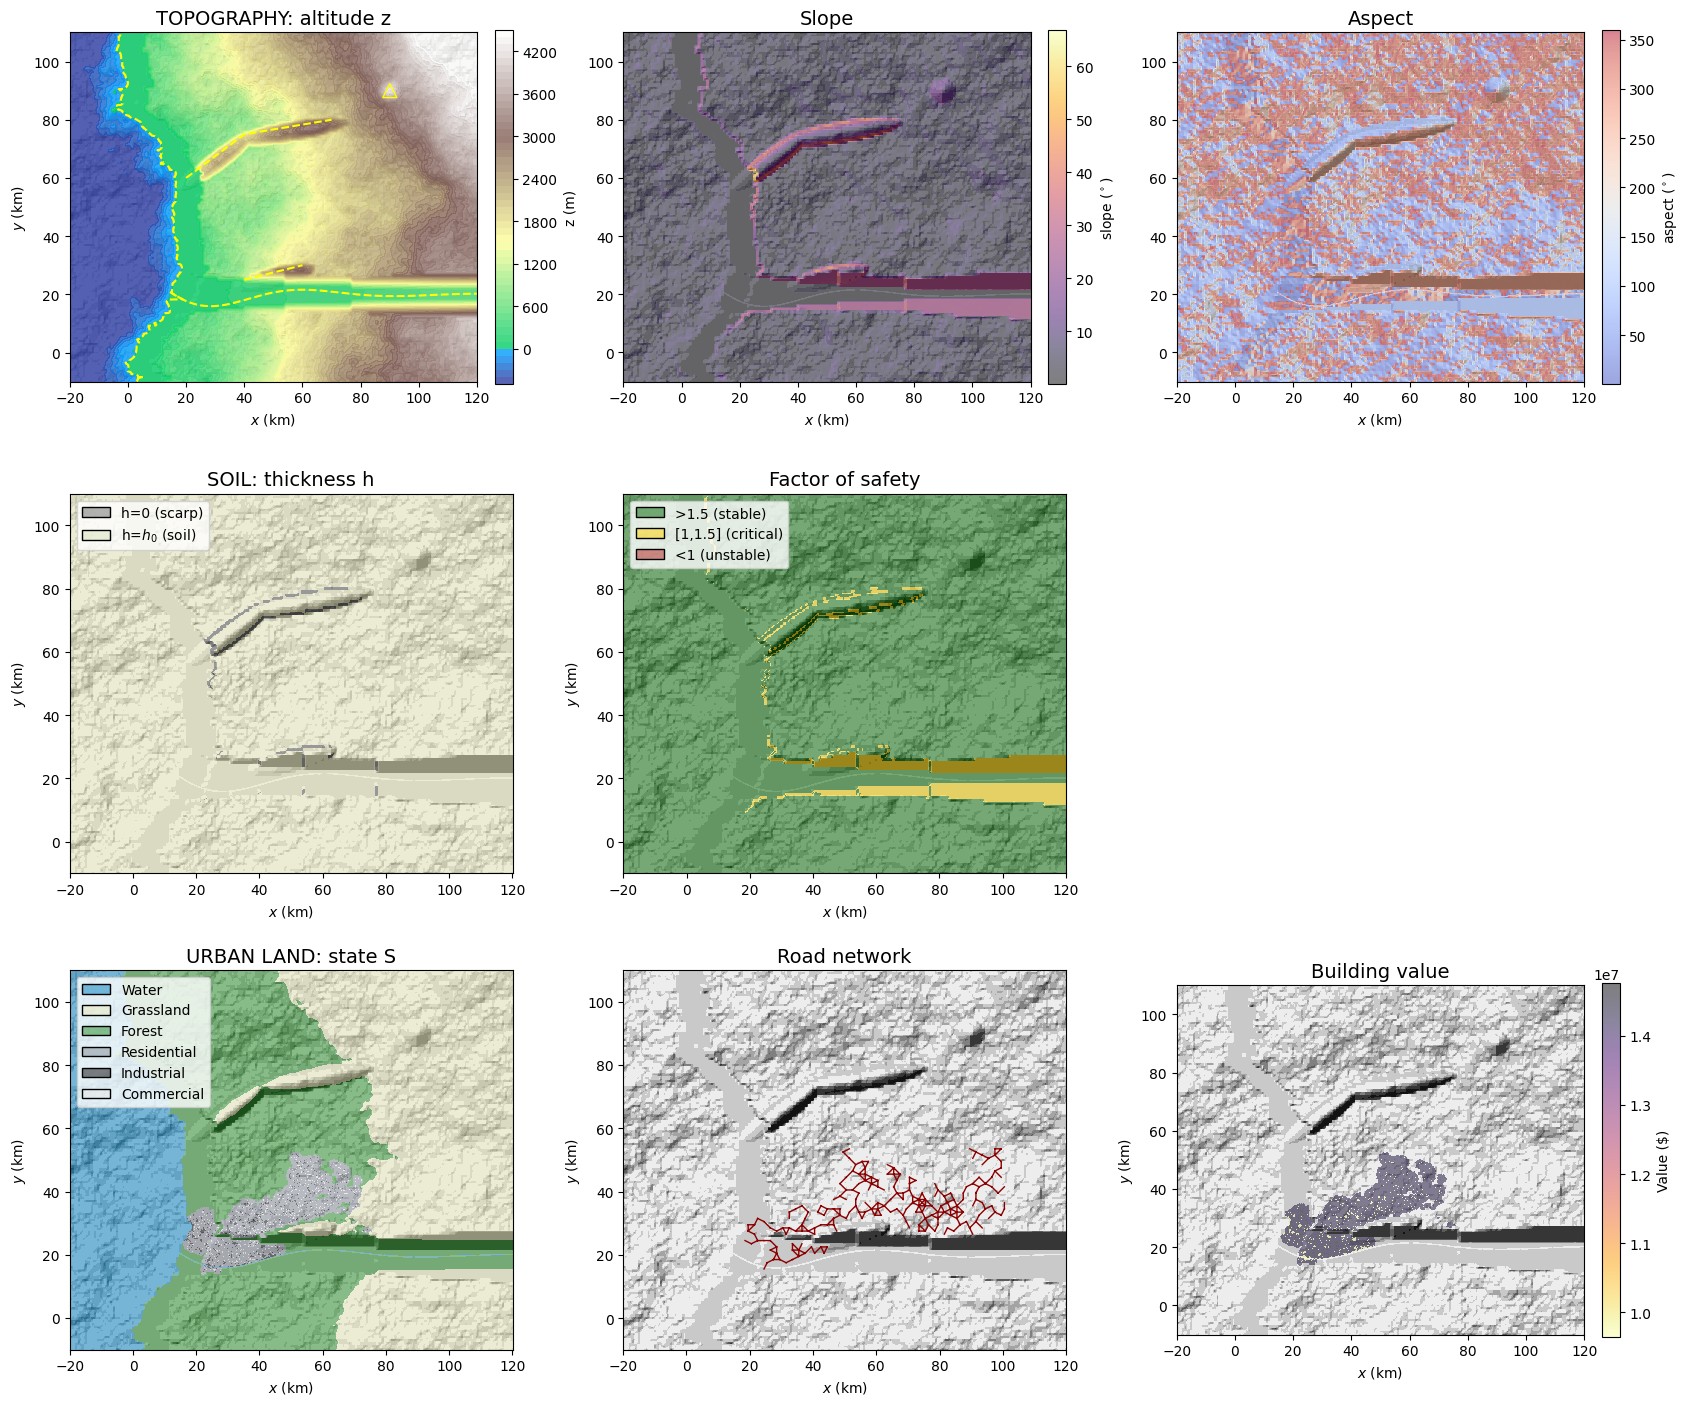

In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

#import warnings 
#warnings.filterwarnings('ignore')   # commented, try to remove all warnings

from GenMR import perils as GenMR_perils
from GenMR import environment as GenMR_env
from GenMR import utils as GenMR_utils


# load inputs (i.e., outputs from Tutorial 1)
file_src = 'src.pkl'
file_topoLayer = 'envLayer_topo.pkl'
file_soilLayer = 'envLayer_soil.pkl'
file_urbLandLayer = 'envLayer_urbLand.pkl'
src = GenMR_utils.load_pickle2class('/io/' + file_src)
grid = copy.copy(src.grid)
topoLayer = GenMR_utils.load_pickle2class('/io/' + file_topoLayer)
soilLayer = GenMR_utils.load_pickle2class('/io/' + file_soilLayer)
urbLandLayer = GenMR_utils.load_pickle2class('/io/' + file_urbLandLayer)

GenMR_env.plot_EnvLayers([topoLayer, soilLayer, urbLandLayer], file_ext = 'jpg')

Note that the configuration of the digital template environment may be changed through Tutorial 1.

## 1. Probabilistic hazard assessment

Event independence is assumed, except for ad-hoc 1-to-1 peril deterministic triggering (e.g., a tropical cyclone triggers a storm surge)...

### 1.1. Peril source definition

Source characteristics were defined in Tutorial 1 for earthquakes, volcanic eruptions and fluvial floods (due to environmental layer dependence on these perils). Additional localised peril sources (`AI`, `SS`, `TC`) will now be introduced, which have no direct impact on the environmental layers currently defined.

TO DEVELOP/REWRITE

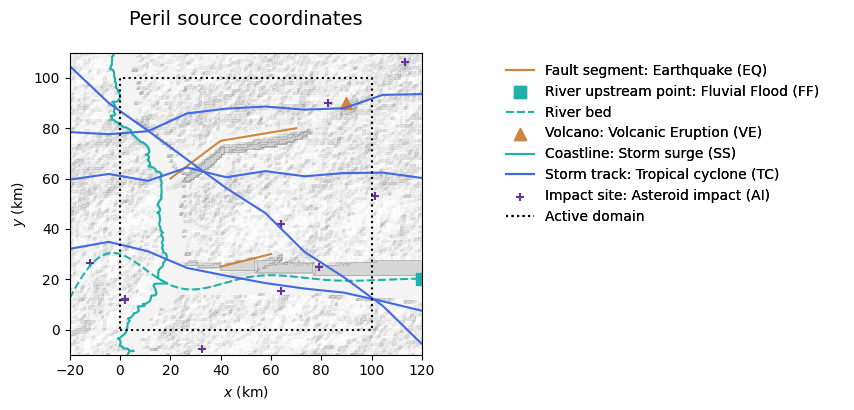

In [4]:
# update src with additional perils & their characteristics
src.par['perils'] = ['AI','EQ','RS','TC','VE', 'FF','LS','SS']    # IMPORTANT: primary perils come first

src.par['EQ']['N'] = 20   # to be later distributed over 3 fault segments
src.par['LS'] = {'object': 'terrain'}
src.par['RS'] = {'object': 'atmosphere', 'N': 3}  # as trigger of landslides
src.par['SS'] = {'object': 'coastline'}
src.par['SS']['x'], src.par['SS']['y'] = topoLayer.coastline_coord
src.par['VE']['N'] = 3

## stochastic sources ##
rdm_seed = 42      # None or integer
np.random.seed(rdm_seed)

# n_AI random uniform asteroid impacts (point sources) in digital template:
N_AI = 10
src.par['AI'] = {'object': 'impact', 'N': N_AI, \
                 'x': grid.xmin + np.random.random(N_AI) * (grid.xmax - grid.xmin), \
                 'y': grid.ymin + np.random.random(N_AI) * (grid.ymax - grid.ymin)}

# n_TC pseudo-random tracks moving from West to East in the digital template:
N_TC = 5
npt = 10              # number of points along track, which crosses the grid from West to East
max_deviation = 3     # random uniform deviation along the y-axis at each track point
x_tracks, y_tracks, ID_tracks = GenMR_perils.gen_rdmcoord_tracks(N_TC, grid, npt, max_deviation, rdm_seed)
src.par['TC'] = {'object': 'storm track', 'N': N_TC, 'x': x_tracks, 'y': y_tracks, 'ID': ID_tracks}

GenMR_env.plot_src(src, hillshading_z = topoLayer.z)

**NOTE:** Hazard intensity footprints are modeled based on the sources shown in the map above. For stochastic sources (`AI`, `TC`), rerunning the previous cell will produce different configurations unless `rdm_seed` is fixed.

### 1.2. Stochastic event set generation

TO DEVELOP

In [ ]:
evPar = {
    'primary': ['AI','EQ','RS','VE','WS'],
    'invisible': ['RS'],
    'secondary': ['FF','LS','SS'],
    
    ## PRIMARY PERILS ##
    'AI':{
        'S_unit': 'Bolide energy $E$ [kton]',
        'Smin': 100, 'Smax': 1e4, 'Sbin': 1, 'Si_method': 'log',
        'stoch_n': 10, 'stoch_w': 'uniform', 'stoch_xy': 'rdmPoint_inGrid',
        'I_unit': 'Overpressure [kPa]', 'I_model': 'blast_kPa_default', 'I_plt': [0,10],
        'D_func': 'blast_kPa_default'
    },
    'EQ':{
        'S_unit': 'Magnitude $M$ []',
        'Smin': 6, 'Smax': 7, 'Sbin': .1, 'Si_method': 'lin',
        'stoch_n': 10, 'stoch_w': 'uniform', 'stoch_xy': 'rdmLine_inEQsrc',       
        'I_unit': 'Peak Ground Acceleration [m/s$^2$]', 'I_model': 'shake_mps2_default', 'I_plt': [0,4],
        'D_func': 'shake_mps2_default'
    },
    'RS':{
        'S_unit': 'Water column [mm/hr]',
        'Smin': 75, 'Smax': 125, 'Sbin': 25, 'Si_method': 'lin',
        'S2_unit': 'Duration [hr]',
        'S2min': None, 'S2max': 24, 'S2bin': 3, 'S2i_method': 'rep',
        'stoch_n': 3, 'stoch_w': 'uniform', 'stoch_xy': 'fullArea_inGrid',
        'I_unit': 'Water column [mm/hr]', 'I_model': 'I_uniform', 'I_plt': [0,75.]
    },
    'VE':{
        'S_unit': 'Ash volume [km$^3$]',
        'Smin': 1, 'Smax': 100, 'Sbin': 1, 'Si_method': 'log',
        'stoch_n': 3, 'stoch_w': 'uniform', 'stoch_xy': 'fixPoint_inSrc',
        'I_unit': 'Ash depth [m]', 'I_model': 'ash_m_default', 'I_plt': [0,.5],
        'D_func': 'ash_m_default'
    },
    'WS':{
        'S_unit': 'Max. wind speed [m/s]',
        'Smin': 40, 'Smax': 70, 'Sbin': 15, 'Si_method': 'lin',
        'stoch_n': 10, 'stoch_w': 'uniform', 'stoch_xy': 'rdmTrack_inGrid',
        'I_unit': 'Wind speed [m/s]', 'I_model': 'wind_mps_default', 'I_plt': [0,60.],
        'D_func': 'wind_mps_default'
    },
    ## SECONDARY PERILS ##
    'FF':{
        'S_unit': 'Discharge [m$^3$/s]',       
        'I_unit': 'Water depth [m]', 'I_model': 'water_m_defaultCA', 'I_plt': [0,1.],
        'CellAut_iter': 100000, 'CellAut_plts': True, 'CellAut_mov': True,
        'D_func': 'water_m_default'
    },
    'LS':{
        'S_unit': 'Area [km$^2$]',
        'I_unit': 'Soil depth [m]', 'I_model': 'soil_m_defaultCA', 'I_plt': [0,1.],
        'CellAut_iter': 50, 'CellAut_plts': True, 'CellAut_mov': True,
        'D_func': 'soil_m_default'
    },
    'SS':{
        'S_unit': 'Discharge [m$^3$/s]',       
        'I_unit': 'Water depth [m]', 'I_model': 'water_m_bathtub', 'I_plt': [0,2.],
        'D_func': 'water_m_default'
    },
    'D_plt': [0,1], 'L_plt': [0,10e6]
}

evTable = GenMR_perils.gen_stochSet(src, evPar)   # add seed option for reproducibility
evTable[0]

`evTable[0]` corresponds to the stochastic event set while `evTable[1]` contains the event coordinates $(x,y,z)$. Event size $S$ is `NaN` when it cannot be described by a scalar on a localizable source. `nstoch` shuffled examples of stochastic events per peril are plotted below with the function `plot_stochEvents()`.
